# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application 

## background

At this project we try to scrap US Dollar (USD) To Indonesian Rupiah (IDR) Exchange Rate History website. The USD/IDR rate is down -4.56% in the six months. This means the US Dollar has decreased in value compared to the Indonesian Rupiah. We will try to scrap this sites for educational purpose only.

This project was developed as one of the capstone projects of the Algorithm Academy Data Analytics Specialization. The expected deliverables from this project are doing simple web scraping to get information. For a step by step guide, ladies and gentlemen are welcome to open my git [Click here](https://github.com/Apipmhd/capstone_webscraping_USDtoIDR). We'll also make use of a simple flask dashboard to display our scrap results and visualizations.


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [21]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [22]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [23]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")


## Finding the right key to scrap the data & Extracting the right information

As we can see from the line we just extract, we get all the content we needed.

The find() function can help us to get our the part of the html code that we needed. 

In [24]:
table = soup.find('table', attrs={'class':'history-rates-data'})
print(table.prettify()[1:500])

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2023-05-12">
     May 12, 2023
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2023-05-12">
     2023-5-12
    </a>
   </td>
   <td>
    <span class="w">
     <span class="now


Finding row length.

In [25]:
row = table.find_all('a', attrs={'class':'w'})
row_length = len(row)
row_length

130

Okay, okay now we know the length of our data, now here what we will do for the looping process. 

Here what the looping do to scrap the information: 

- First we need to establish a placeholder to receive the information that we scrap. 
- We named our placeholder `temp` and it's a list. 
- Then we will make a loop from one until the the length of the table row, 
- which we will find all cell of the column one and two which contain period and the USD to IDR rate. 
- Then we will append it to our tuple that we prepared before, 
- every one literation we will scrap one line of the table.  

In [26]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #scrapping process
    period = table.find_all('a', attrs={'class':'w'})[i].text
    
    dolar_rupiah = table.find_all('span', attrs={'class':'w'})[i].text
    
    temp.append((period,dolar_rupiah))
    
temp

[('May 12, 2023', '$1 = Rp14,844'),
 ('May 11, 2023', '$1 = Rp14,776'),
 ('May 10, 2023', '$1 = Rp14,698'),
 ('May 9, 2023', '$1 = Rp14,776'),
 ('May 8, 2023', '$1 = Rp14,744'),
 ('May 5, 2023', '$1 = Rp14,675'),
 ('May 4, 2023', '$1 = Rp14,699'),
 ('May 3, 2023', '$1 = Rp14,680'),
 ('May 2, 2023', '$1 = Rp14,747'),
 ('May 1, 2023', '$1 = Rp14,677'),
 ('April 28, 2023', '$1 = Rp14,674'),
 ('April 27, 2023', '$1 = Rp14,691'),
 ('April 26, 2023', '$1 = Rp14,841'),
 ('April 25, 2023', '$1 = Rp14,940'),
 ('April 24, 2023', '$1 = Rp14,934'),
 ('April 21, 2023', '$1 = Rp14,936'),
 ('April 20, 2023', '$1 = Rp14,954'),
 ('April 19, 2023', '$1 = Rp14,995'),
 ('April 18, 2023', '$1 = Rp14,889'),
 ('April 17, 2023', '$1 = Rp14,850'),
 ('April 14, 2023', '$1 = Rp14,782'),
 ('April 13, 2023', '$1 = Rp14,722'),
 ('April 12, 2023', '$1 = Rp14,835'),
 ('April 11, 2023', '$1 = Rp14,915'),
 ('April 10, 2023', '$1 = Rp14,950'),
 ('April 7, 2023', '$1 = Rp14,941'),
 ('April 6, 2023', '$1 = Rp14,931'),
 ('

## Creating data frame & Data wrangling

Put the array into dataframe

In [27]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('period','dolar_rupiah'))
df.head()

,period,dolar_rupiah
0,"May 12, 2023","$1 = Rp14,844"
1,"May 11, 2023","$1 = Rp14,776"
2,"May 10, 2023","$1 = Rp14,698"
3,"May 9, 2023","$1 = Rp14,776"
4,"May 8, 2023","$1 = Rp14,744"


Let's check our dataframe data types to see if our data is useable. 

In [28]:
df.dtypes


period          object
dolar_rupiah    object
dtype: object

Usual stuff, we can clean the data or save it to csv let's do a bit cleaning so we can do a bit of visualisation. We will change `period` to `datetime64[ns]`, `dolar_rupiah` to `float64` datatype, but before we can do that we need to change the '$1 ' to '', '=' to '', 'Rp' to '', ',' to '' first. To do this we can use the help of str.replace(). Then lastly let's fix our period data type.

In [29]:
df['period'] = df['period'].astype('datetime64[ns]')
df['dolar_rupiah'] = df['dolar_rupiah'].str.replace('$1 ','')
df['dolar_rupiah'] = df['dolar_rupiah'].str.replace('=','')
df['dolar_rupiah'] = df['dolar_rupiah'].str.replace('Rp','')
df['dolar_rupiah'] = df['dolar_rupiah'].str.replace(',','')
df['dolar_rupiah'] = df['dolar_rupiah'].astype('float64')

df.dtypes

period          datetime64[ns]
dolar_rupiah           float64
dtype: object

check the data again


In [30]:
df.head()

,period,dolar_rupiah
0,2023-05-12,14844.0
1,2023-05-11,14776.0
2,2023-05-10,14698.0
3,2023-05-09,14776.0
4,2023-05-08,14744.0


To make our plot behave like we want, we need to set our index of our dataframe to our time coloumn. We can use `set_index()` 

In [31]:
df = df.set_index('period')

And done, We can do our simple visualisation to put the cherry on top.

<Axes: xlabel='period'>

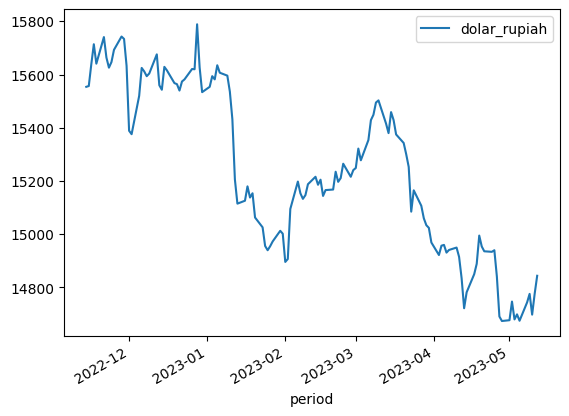

In [32]:
df.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<Axes: xlabel='period'>

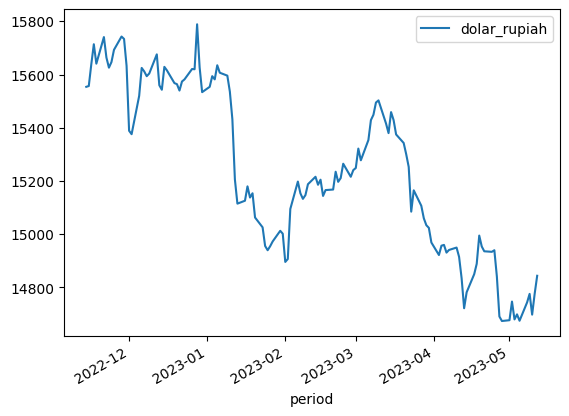

In [33]:
df.plot()

We already finish our web scrapping job, now we have all the data we need and we can move on to the next part of the project using pandas usual. In conclusion when you don't have a direct access to a data from a website you can always do the scrapping method. There is a couple library that can do same task like scrapy that can build bot to automaticly crawl data, but we choose beautiful soup since it's more beginner friendly and a helpful utility that allows a programmer to get specific elements out of a webpage (for example, a list of images)

so much web scrapping from me, if there are any shortage, I apologize profusely.

Thank You :))

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.